In [1]:
from imutils import face_utils
from imutils.video import VideoStream
import argparse
import imutils
import dlib
import cv2
import time
import numpy as np
from PIL import Image as im
from matplotlib import pyplot as plt

In [2]:
imagePath = "/home/guigxs/Documents/FaceRecognition/picture_2021-11-16_09-51-37.jpg"
trainedPath = "/home/guigxs/Documents/FaceRecognition/shape_predictor_68_face_landmarks.dat"

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(trainedPath)

In [4]:
# load the input image, resize it, and convert it to grayscale
image = cv2.imread(imagePath)
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# detect faces in the grayscale image
rects = detector(gray, 1)

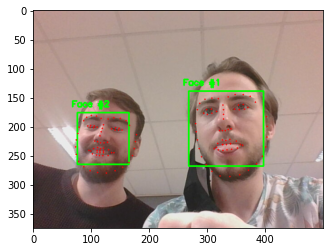

In [5]:
# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    # convert dlib's rectangle to a OpenCV-style bounding box
    # [i.e., (x, y, w, h)], then draw the face bounding box
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # show the face number
    cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for (x, y) in shape:
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

plt.imshow(imutils.opencv2matplotlib(image))
plt.show()